In [1]:
import nltk
import operator
import glob
import re
from collections import Counter
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
word_list=nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(word_list)
filtered_words = filter(lambda token: token not in stopwords.words('english'), tokens)

In [2]:
for filename in glob.iglob('C:/Users/kmsharma90/Desktop/ClassPython/Assignment 2/gutenberg/**/*.txt', recursive=True):
    if 'hamlet' in filename:
        f = open(filename, 'r')
        content = f.read().split()
        fdist = Counter(content)
        print(dict(fdist))

{'Fortune': 2, 'Recoueries:': 1, 'hat': 2, 'Place,': 1, 'vnfold': 2, 'spoken,': 1, 'rabble': 1, 'lest': 1, 'Foyle': 1, 'instantly': 1, 'dust;': 2, 'mad': 9, 'is:': 2, 'Hill,': 1, "rais'd": 1, 'sits;': 1, 'towards': 2, "appear'd": 3, 'aye,': 1, 'keepes': 4, 'a-while,': 2, 'Think': 1, 'earnest': 1, 'According': 1, 'strooke': 3, 'ordinate;': 1, 'vigour': 1, 'Becomes': 1, 'on': 100, 'nerue:': 1, 'coozenage;': 1, 'faire': 13, 'Handsaw.': 1, 'honest?': 1, 'fares': 2, 'crust,': 1, 'reckoning': 1, 'Ceremony.': 1, 'might': 26, 'soule,': 6, 'bleede': 1, 'enough': 2, 'off.': 3, 'together': 1, 'hearing,': 1, 'cried,': 1, 'dilated': 1, 'doore': 2, 'Gho.': 9, 'him:': 10, 'Farwell': 1, "vpon't:": 1, 'Denmarke:': 1, 'Meet': 1, 'sayes:': 1, 'poore': 18, 'Ere': 4, 'Satyricall': 1, 'Nunnerie.': 1, '(in': 1, 'long:': 1, 'Lions': 1, 'Age,': 2, 'Mermaid-like,': 1, 'bosome:': 1, 'bloud;': 1, 'hearers': 1, 'Dropping': 1, 'fatted': 1, 'Sutes,': 1, 'Friend,': 2, 'terme': 2, 'sense:': 1, 'Gonzago:': 1, 'huge': 1

In [3]:
import csv
rank_dict={}

In [4]:
for k, v in dict(fdist).items():
    rank_dict[v] = rank_dict.get(v, [])
    rank_dict[v].append(k)

In [5]:
sorted_rank_dict=sorted(rank_dict.items(),key=operator.itemgetter(0),reverse=True)
rank_hash_set={}

count=0
for x in sorted_rank_dict:
    count=count+1;
    rank_hash_set[count]=x;
    
print(rank_hash_set.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111])


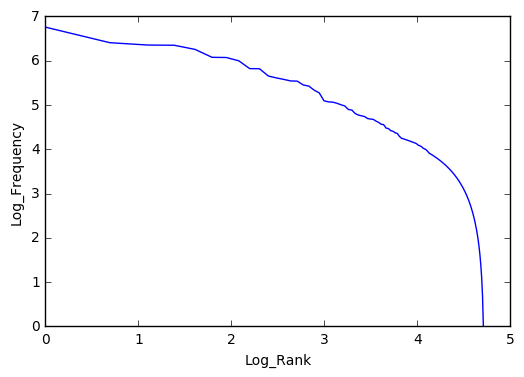

In [6]:

with open('C:/Users/kmsharma90/Desktop/ClassPython/Assignment 2/test.csv', 'w') as csvfile:
    fieldnames = ['Rank', 'Frequency', 'Word']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for k,v in rank_hash_set.items():
        value=v
        for word in value[1]:
            writer.writerow({'Rank': k, 'Frequency': value[0],'Word':word})

from csv import DictReader
import matplotlib.pyplot as plt
import math
with open("C:/Users/kmsharma90/Desktop/ClassPython/Assignment 2/test.csv") as file_read:
    log_rank = [math.log(float(row["Rank"])) for row in DictReader(file_read)]

with open("C:/Users/kmsharma90/Desktop/ClassPython/Assignment 2/test.csv") as file_read:
    log_freq = [math.log(float(row["Frequency"])) for row in DictReader(file_read)]
    

plt.plot(log_rank, log_freq)
plt.xlabel('Log_Rank')
plt.ylabel('Log_Frequency')
plt.show()